Unsupervised Learning - 
Principal Component Analysis

Adi Sapto Raharjo (1821211002)
Magister Teknik Informatika


Sebagai contoh yang berfungsi, pada bagian ini kita akan menggunakan dataset digit tulisan tangan yang didigitalkan dalam matriks 8x8 piksel, sehingga setiap instance awalnya terdiri dari 64 atribut. Bagaimana bisa memvisualisasikan distribusi contoh?

Memvisualisasikan 64 dimensi pada saat yang sama tidak mungkin dilakukan manusia, jadi saat ini akan menggunakan PCA untuk mengurangi instans menjadi dua dimensi dan memvisualisasikan distribusinya dalam grafik sebar dua dimensi

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target


In [2]:
print (digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


Dibawah ini akan menggunakan matriks data yang memiliki instance masing-masing 64 atribut dan vektor target yang memiliki nomor digit yang sesuai.

In [3]:
import matplotlib.pyplot as plt
n_row, n_col = 2, 5
def print_digits(images, y, max_n=10): 
    # set up the figure size in inches 
    fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row)) 
    i=0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone, interpolation='nearest')
        # label the image with the target value 
        p.text(0, -1, str(y[i])) 
        i = i + 1
print_digits(digits.images, digits.target, max_n=10)

Tentukan fungsi yang akan memplot sebaran dengan titik dua dimensi yang akan diperoleh oleh transformasi PCA. 

Poin data juga akan diwarnai sesuai dengan kelas mereka. Ingat bahwa kelas target tidak akan digunakan untuk melakukan transformasi

Saat ini ingin diselidiki apakah distribusi setelah PCA mengungkapkan distribusi kelas yang berbeda, dan jika mereka jelas dapat dipisahkan. selanjutnya akan menggunakan sepuluh warna berbeda untuk masing-masing digit, dari 0 hingga 9.

In [4]:
def plot_pca_scatter(): 
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray'] 
    for i in range(len(colors)): 
        px = X_pca[:, 0][y_digits == i] 
        py = X_pca[:, 1][y_digits == i] 
        plt.scatter(px, py, c=colors[i]) 
        plt.legend(digits.target_names) 
        plt.xlabel('First Principal Component') 
        plt.ylabel('Second Principal Component')

Pada titik ini, akan siap untuk melakukan transformasi PCA. Dalam scikit-learning, PCA diimplementasikan sebagai objek transformator yang mempelajari sejumlah komponen melalui metode fit, dan dapat digunakan pada data baru untuk memproyeksikannya ke komponen-komponen ini.

Dalam scikit-learn, memiliki berbagai kelas yang mengimplementasikan berbagai jenis dekomposisi PCA, seperti PCA, ProbabilisticPCA, RandomizedPCA, dan KernelPCA. Jika memerlukan deskripsi terperinci tentang masing-masing, silakan merujuk ke dokumentasi scikit-learn.

Dalam kasus ini, akan bekerja dengan kelas PCA dari modul sklearn.decomposition. Parameter terpenting yang dapat kita ubah adalah n_components, yang memungkinkan kita menentukan jumlah fitur yang dimiliki oleh instance yang didapat. Dalam kasus kami, kami ingin mengubah instance dari 64 fitur menjadi instance dari hanya dua fitur, jadi kami akan mengatur n_components menjadi 2.

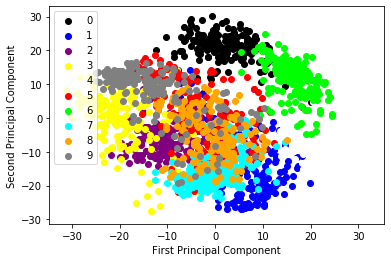

In [5]:
from sklearn.decomposition import PCA 
estimator = PCA(n_components=10) 
X_pca = estimator.fit_transform(X_digits) 
plot_pca_scatter()

Dari gambar sebelumnya, dapat ditarik beberapa kesimpulan menarik:

• Dapat melihat 10 kelas yang berbeda sesuai dengan 10 digit pada pandangan pertama. diketahui bahwa untuk sebagian besar kelas, instance mereka jelas dikelompokkan dalam kelompok sesuai dengan kelas target mereka, dan juga bahwa kelompok relatif berbeda. Pengecualian adalah kelas yang berhubungan dengan angka 5 dengan contoh yang sangat jarang didistribusikan di atas bidang yang tumpang tindih dengan kelas lainnya. 

• Pada ekstrim lain, kelas yang sesuai dengan digit 0 adalah cluster yang paling terpisah. Secara intuitif, kelas ini mungkin yang paling mudah untuk dipisahkan dari yang lain; yaitu, jika melatih classifier, itu harus kelas dengan angka evaluasi terbaik. 

• Juga, untuk distribusi topologi, dapat dilakukan dengan memprediksi bahwa kelas yang berdekatan sesuai dengan digit yang sama, yang berarti mereka akan menjadi yang paling sulit untuk dipisahkan. Sebagai contoh, cluster yang sesuai dengan angka 9 dan 3 tampak bersebelahan (yang akan diharapkan karena representasi grafis mereka serupa), sehingga mungkin lebih sulit untuk memisahkan angka 9 dari angka 3 dari angka 9 dari angka 4, yang ada pada sisi kiri, jauh dari kluster ini.

Perhatikan bahwa dengan cepat mendapatkan grafik yang memberi kami banyak wawasan tentang masalah tersebut. Teknik ini dapat digunakan sebelum melatih classifier yang diawasi untuk lebih memahami kesulitan yang mungkin kita hadapi.

Dengan pengetahuan ini, dapat merencanakan preprocessing fitur yang lebih baik, pemilihan fitur, pilih model pembelajaran yang lebih cocok, dan sebagainya. Seperti yang telah sebutkan sebelumnya, ini juga dapat digunakan untuk melakukan pengurangan dimensi untuk menghindari kutukan dimensi dan juga memungkinkan kita untuk menggunakan metode pembelajaran yang lebih sederhana, seperti model linear. Untuk menyelesaikannya, mari dilihat transformasi komponen utama. selanjutnya akan mengambil komponen utama dari estimator dengan mengakses atribut komponen.Setiap komponennya adalah matriks yang digunakan untuk mengubah vektor dari ruang asli ke ruang yang ditransformasikan. saat ini hanya memperhitungkan dua komponen pertama.

Selanjutnya akan memplot semua komponen dalam bentuk yang sama dengan data asli (digit).

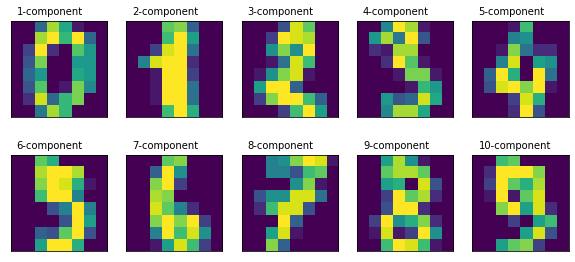

In [6]:
def print_pca_components(images, n_col, n_row): 
        plt.figure(figsize=(2. * n_col, 2.26 * n_row)) 
        
        for i, comp in enumerate(images): 
            plt.subplot(n_row, n_col, i + 1) 
            plt.imshow(comp.reshape((8, 8)), interpolation='nearest') 
            plt.text(0, -1, str(i + 1) + '-component') 
            plt.xticks(()) 
            plt.yticks(())

print_pca_components(digits.images[0:10], 5,2)

Komponen-komponen tersebut dapat dilihat pada hasil diatas.